In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import re
from nltk.tokenize import word_tokenize

In [59]:
amazon = pd.read_csv("sentiment_amazon.csv")

In [60]:
amazon.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [61]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 2 columns):
review       771 non-null object
sentiment    771 non-null int64
dtypes: int64(1), object(1)
memory usage: 12.1+ KB


# 2.	Bag of word analysis

In [57]:
df = amazon.copy()

##### Text Transformations

In [10]:
#Convert all text to lower case
doc = df['review'].str.lower()
doc.head()

0    so there is no way for me to plug it in here i...
1                               great for the jawbone.
2    tied to charger for conversations lasting more...
3                                    the mic is great.
4    i have to jiggle the plug to get it to line up...
Name: review, dtype: object

In [12]:
# Retain alphabets, numbers, spaces, hashtags and @ symbols and remove everthing else
doc_clean = doc.str.replace('[^a-z #@]','')
doc_clean.head()

0    so there is no way for me to plug it in here i...
1                                great for the jawbone
2    tied to charger for conversations lasting more...
3                                     the mic is great
4    i have to jiggle the plug to get it to line up...
Name: review, dtype: object

###### Implementing Stop words

In [15]:
stopwords = nltk.corpus.stopwords.words('english') # Default 179 english common words 
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
stopwords = nltk.corpus.stopwords.words('english') # Default 179 english common words 


def row_clean(v):
    # 1. Remove Common stop words.
    terms_v = v.split(' ')
    terms_v = [term for term in terms_v if term not in stopwords]
    # terms_v = np.setdiff1d(terms_v, stopwords)   
    # One word per term: unigram, similarly bigram, trigram, n-gram, etc.
    
    # 2. Identify root of each word.  (Also called as Text Normalization/Cleaning)
    stemmer = PorterStemmer()
    terms_v = [stemmer.stem(term) for term in terms_v]
    
    
    return ' '.join(terms_v)
doc_clean = doc_clean.apply(lambda v: row_clean(v))

In [23]:
df["review_cln"]=doc_clean

In [24]:
df.head()

,review,sentiment,review_cln
0,So there is no way for me to plug it in here i...,0,way plug us unless go convert
1,Great for the jawbone.,1,great jawbon
2,Tied to charger for conversations lasting more...,0,tie charger convers last minutesmajor problem
3,The mic is great.,1,mic great
4,I have to jiggle the plug to get it to line up...,0,jiggl plug get line right get decent volum


In [25]:
final = df.copy()

In [29]:
final_senti = final.drop("review", axis =1)
final_senti.head()

,sentiment,review_cln
0,0,way plug us unless go convert
1,1,great jawbon
2,0,tie charger convers last minutesmajor problem
3,1,mic great
4,0,jiggl plug get line right get decent volum


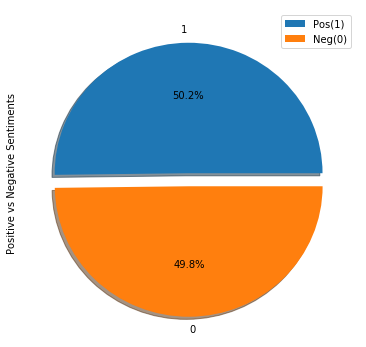

In [31]:
final_senti["sentiment"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Positive vs Negative Sentiments")
plt.legend(["Pos(1)", "Neg(0)"])
plt.show()

In [38]:
pos_senti = final_senti[final_senti["sentiment"] == 1]["review_cln"]
neg_senti = final_senti[final_senti["sentiment"] == 0]["review_cln"]

# b.	Create a word cloud using positive reviews alone and identify important terms that are frequently appearing

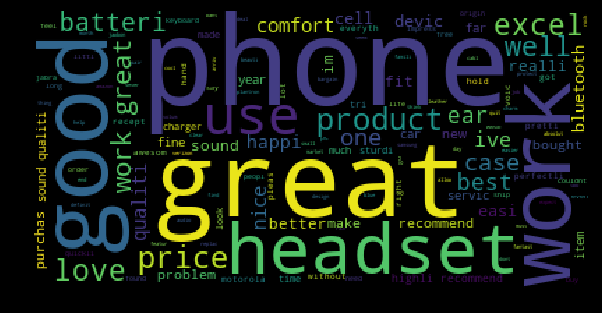

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8), facecolor = 'k')
wc = WordCloud().generate(' '.join(pos_senti))  # space as delimiter 
plt.imshow(wc)

In [47]:
pos_words = np.array(pos_senti)
print("Top 10 Postivie sentimental phrases are :\n")
pd.Series(pos_words).value_counts().head(n = 10) 

Top 10 Postivie sentimental phrases are :



great phone            8
work great             6
work                   2
love phone             2
would recommend        2
excel product price    2
great deal             2
great product price    2
work well              2
happi product          2
dtype: int64

# c.	Create a word cloud using negative reviews alone and identify important terms that are frequently appearing. Identify some products which are very frequently appearing in negative reviews

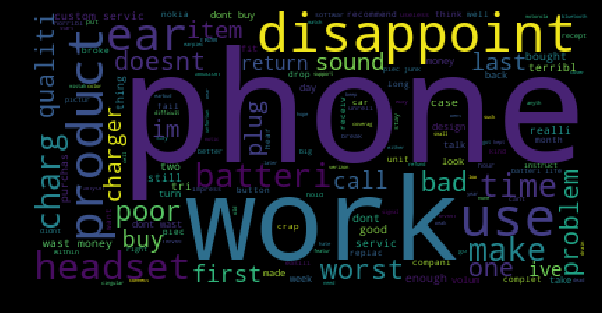

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8), facecolor = 'k')
wc = WordCloud().generate(' '.join(neg_senti))  # space as delimiter 
plt.imshow(wc)

In [68]:
neg_words = np.array(neg_senti)
print("Top 10 Negative Sentimental phrases are :\n")
pd.Series(neg_words).value_counts().head(n = 10) 

Top 10 Negative Sentimental phrases are :



disappoint                                 8
dont wast money                            3
fit                                        2
dont buy                                   2
work                                       2
dont buy product                           2
send back                                  2
wast money                                 2
sprint  terribl custom servic              1
bought phone replac startac regret sinc    1
dtype: int64

# 3.	Without cleaning the dataset, identify sentiment for each review using VADER package in nltk. This is unsupervised prediction, hence you will not be using the labelled column

##### Sentiment Analysis
* No lower case
* We will not remove punctuations etc

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

C:\Users\hp\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [52]:
#Testing
senti = SentimentIntensityAnalyzer()
print(senti.polarity_scores('i LOVE india!!!'))
print(senti.polarity_scores('i love india')['compound'])

{'neg': 0.0, 'neu': 0.147, 'pos': 0.853, 'compound': 0.7788}
0.6369


In [62]:
amazon.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [63]:
amazon['sentiment_score'] = amazon['review'].apply(lambda v: senti.polarity_scores(v)['compound'])
# lambda used to get only the compound scores from the senti.polarity_scores function

amazon['sentiment_score'].head()

0   -0.3535
1    0.6249
2   -0.6145
3    0.6249
4    0.0000
Name: sentiment_score, dtype: float64

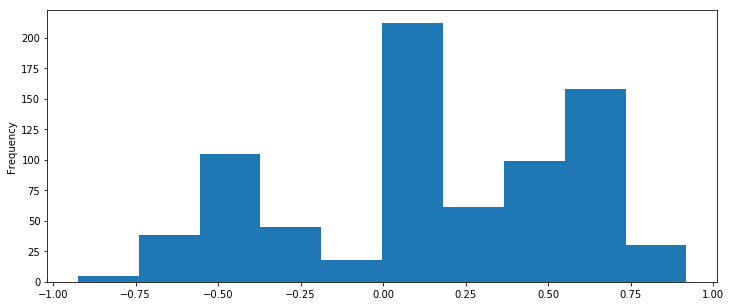

In [64]:
amazon['sentiment_score'].plot.hist(figsize = (12,5))

In [65]:
def assign_sentiment(score):
    if score >0.25:
        return 'Positive'
    if score < -.25:
        return 'Negative'
    else:
        return 'Neutral'

amazon['sentiment_vadar'] = amazon['sentiment_score'].apply(assign_sentiment)
amazon['sentiment_vadar'].value_counts()

Positive    337
Neutral     246
Negative    188
Name: sentiment_vadar, dtype: int64

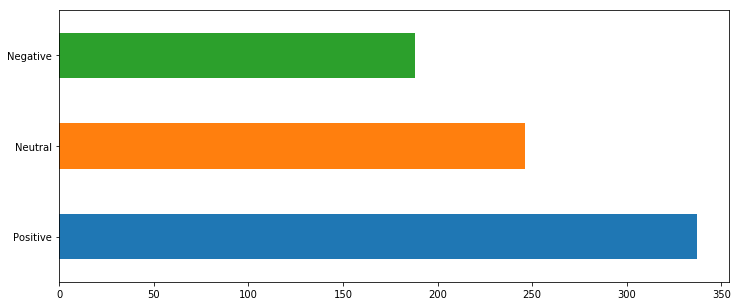

In [66]:
(amazon['sentiment_vadar'].value_counts()).plot.barh(figsize = (12,5))

# 4.	Apply Random Forest or Adaboost model to treat this as an supervised model by using the labelled column

In [69]:
amazon.head()

,review,sentiment,sentiment_score,sentiment_vadar
0,So there is no way for me to plug it in here i...,0,-0.3535,Negative
1,Great for the jawbone.,1,0.6249,Positive
2,Tied to charger for conversations lasting more...,0,-0.6145,Negative
3,The mic is great.,1,0.6249,Positive
4,I have to jiggle the plug to get it to line up...,0,0.0000,Neutral


In [71]:
stopwords = nltk.corpus.stopwords.words('english')
custom_stop_words = ['amp']
stopwords.extend(custom_stop_words)
from sklearn.feature_extraction.text import CountVectorizer
doc = amazon['review'].fillna('').str.lower()
doc_clean = doc.str.replace('[^a-z #@]', '')

def clean_row(row):
    row_words = row.split(' ')
    words_clean = [word for word in row_words if word not in stopwords]
    return ' ' .join(words_clean)
doc_clean = doc_clean.apply(clean_row)

from sklearn.model_selection import train_test_split
train, test = train_test_split(doc_clean, test_size = 0.3, random_state = 100)
train_rows = train.index
test_rows = test.index

cv = CountVectorizer()
cv.fit(doc_clean.loc[train_rows])

train_dtm_sparse = cv.transform(doc_clean.loc[train_rows]) # doc_clean.loc[train_rows] = train
train_dtm_matrix = train_dtm_sparse.toarray()
train_df_dtm = pd.DataFrame(train_dtm_matrix, columns = cv.get_feature_names())

train_x = train_df_dtm
train_y = amazon.loc[train_rows, 'sentiment_vadar']

In [75]:
test_dtm_sparse = cv.transform(doc_clean.loc[test_rows])
test_dtm_matrix = test_dtm_sparse.toarray()
test_df_dtm = pd.DataFrame(test_dtm_matrix, columns = cv.get_feature_names())

test_x = test_df_dtm
test_y = amazon.loc[test_rows, 'sentiment_vadar']

In [83]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_curve,auc

In [85]:
print("Train Data\n\n",train_y.head())
print("\nTest Data\n\n",test_y.head())

Train Data

 111    Positive
551     Neutral
455    Positive
155    Positive
150     Neutral
Name: sentiment_vadar, dtype: object

Test Data

 114    Positive
19     Negative
483    Positive
366     Neutral
513    Positive
Name: sentiment_vadar, dtype: object


### Random Forest

In [89]:
rf_model = RandomForestClassifier(n_estimators = 300, random_state = 100)
rf_model.fit(train_x,train_y)
predict_sentiment_rf = rf_model.predict(test_x)

In [88]:
# Evaluating
print ("Accuracy : %0.5f \n\n" % accuracy_score(test_y, predict_sentiment_rf))
print (classification_report(test_y, predict_sentiment_rf))

Accuracy : 0.74138 


             precision    recall  f1-score   support

   Negative       0.80      0.52      0.63        63
    Neutral       0.63      0.86      0.73        74
   Positive       0.84      0.79      0.82        95

avg / total       0.76      0.74      0.74       232



### To check the depth value for the model

In [133]:
print(test_y.value_counts())
print(train_y.value_counts())

Positive    95
Neutral     74
Negative    63
Name: sentiment_vadar, dtype: int64
Positive    242
Neutral     172
Negative    125
Name: sentiment_vadar, dtype: int64


In [143]:
max_depths = list(range(1,30))
train_errors = []
test_errors = []
for depth in max_depths:
    model_dt = RandomForestClassifier(max_depth = depth)
    model_dt.fit(train_x, train_y)
    predict_sentiment_train = model_dt.predict(train_x)
    predict_sentiment_test = model_dt.predict(test_x)
    
    acc_train = accuracy_score(train_y,predict_sentiment_train) * 100
    err_train = 100 - acc_train
    train_errors.append(err_train)
    
    acc_test = accuracy_score(test_y,predict_sentiment_test) * 100
    err_test = 100 - acc_test
    test_errors.append(err_test)

In [144]:
pd.DataFrame({'depth': max_depths, 'train_erros':train_errors, 'test_error': test_errors})

,depth,train_erros,test_error
0,1,54.174397,58.620690
1,2,54.359926,58.620690
2,3,50.092764,56.465517
3,4,49.165121,54.310345
4,5,51.576994,55.603448
5,6,46.938776,56.034483
6,7,44.526902,53.017241
7,8,42.486085,46.551724
8,9,43.042672,55.172414
9,10,37.847866,47.413793


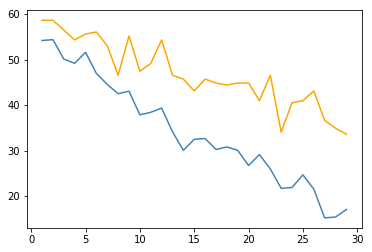

In [145]:
import matplotlib.pyplot as plt
plt.plot(max_depths, train_errors, color = 'steelblue')
plt.plot(max_depths, test_errors,color =  'orange')

In [146]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':list(range(1,30))}

model = RandomForestClassifier()
grid_cv = GridSearchCV(model, param_grid = params)
grid_cv.fit(train_x,train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [147]:
grid_cv.best_params_

{'max_depth': 21}

In [148]:
grid_cv.grid_scores_

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.45083, std: 0.00343, params: {'max_depth': 1},
 mean: 0.45455, std: 0.01088, params: {'max_depth': 2},
 mean: 0.44898, std: 0.00490, params: {'max_depth': 3},
 mean: 0.46939, std: 0.01929, params: {'max_depth': 4},
 mean: 0.45640, std: 0.00631, params: {'max_depth': 5},
 mean: 0.45826, std: 0.01616, params: {'max_depth': 6},
 mean: 0.46753, std: 0.01673, params: {'max_depth': 7},
 mean: 0.46197, std: 0.01682, params: {'max_depth': 8},
 mean: 0.49536, std: 0.01170, params: {'max_depth': 9},
 mean: 0.49722, std: 0.01175, params: {'max_depth': 10},
 mean: 0.48794, std: 0.03502, params: {'max_depth': 11},
 mean: 0.48794, std: 0.01178, params: {'max_depth': 12},
 mean: 0.49722, std: 0.01175, params: {'max_depth': 13},
 mean: 0.50649, std: 0.00346, params: {'max_depth': 14},
 mean: 0.48423, std: 0.01542, params: {'max_depth': 15},
 mean: 0.52690, std: 0.01424, params: {'max_depth': 16},
 mean: 0.50649, std: 0.02174, params: {'max_depth': 17},
 mean: 0.54545, std: 0.01540, params: {'

### AdaBoost

In [90]:
adb_model = AdaBoostClassifier(n_estimators = 300, random_state = 100)
adb_model.fit(train_x,train_y)
predict_sentiment_adb = adb_model.predict(test_x)

In [92]:
# Evaluating
print ("Accuracy : %0.5f \n\n" % accuracy_score(test_y, predict_sentiment_adb))
print (classification_report(test_y, predict_sentiment_adb))

Accuracy : 0.66379 


             precision    recall  f1-score   support

   Negative       0.72      0.37      0.48        63
    Neutral       0.59      0.85      0.70        74
   Positive       0.73      0.72      0.72        95

avg / total       0.68      0.66      0.65       232



# 5.	Using KMeans algorithm cluster the reviews in to two groups. Create wordclouds separately for each cluster. Using the word cloud, see if you can identify which cluster could be for positive and negative reviews 

In [99]:
original = pd.read_csv("sentiment_amazon.csv")

In [101]:
original.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [93]:
from sklearn.cluster import KMeans

In [103]:
def row_clean(row):
    stopwords = nltk.corpus.stopwords.words('english')
    custom_stop_words = ["amp","rt"]
    stopwords.extend(custom_stop_words)
    words = row.split(' ')
    words_clean = [word for word in words if word not in stopwords]
    return ' '.join(words_clean)

doc_clean = original['review'].str.lower().str.replace('[^a-z #@]','')
doc_clean = doc_clean.apply(row_clean)
doc_clean.head(5)

0                      way plug us unless go converter
1                                        great jawbone
2    tied charger conversations lasting  minutesmaj...
3                                            mic great
4         jiggle plug get line right get decent volume
Name: review, dtype: object

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(doc_clean)
dtm_sparse = cv.transform(doc_clean)
dtm_matrix = dtm_sparse.toarray()

df_dtm = pd.DataFrame(dtm_matrix, columns = cv.get_feature_names())
print(df_dtm.shape)
df_dtm.head(5)

(771, 1284)


,ability,able,abound,abovepretty,absolutel,absolutely,ac,accept,acceptable,accessable,...,wrong,wrongfirst,year,years,yes,yet,youd,youll,za,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
model = KMeans(n_clusters=2)
model.fit(df_dtm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [122]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_dtm)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3487.424125
1,2,3395.041344
2,3,3360.053990
3,4,3301.280675
4,5,3320.386448
5,6,3263.829726
6,7,3216.399466
7,8,3216.351230
8,9,3168.458168
9,10,3219.415640


In [126]:
from sklearn.cluster import KMeans
centroids = model.cluster_centers_

In [128]:
centroid_df = pd.DataFrame(centroids, columns = list(df_dtm) )
centroid_df

,ability,able,abound,abovepretty,absolutel,absolutely,ac,accept,acceptable,accessable,...,wrong,wrongfirst,year,years,yes,yet,youd,youll,za,zero
0,-1.301043e-18,3.035766e-18,-6.505213e-19,-6.505213e-19,-6.505213e-19,3.035766e-18,-6.505213e-19,-6.505213e-19,-6.505213e-19,-6.505213e-19,...,-6.505213e-19,2.439024e-02,-2.602085e-18,6.071532e-18,-6.505213e-19,3.035766e-18,-6.505213e-19,-6.505213e-19,-6.505213e-19,-6.505213e-19
1,2.739726e-03,4.109589e-03,1.369863e-03,1.369863e-03,1.369863e-03,4.109589e-03,1.369863e-03,1.369863e-03,1.369863e-03,1.369863e-03,...,1.369863e-03,4.119968e-18,5.479452e-03,8.219178e-03,1.369863e-03,4.109589e-03,1.369863e-03,1.369863e-03,1.369863e-03,1.369863e-03


In [130]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(model.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [169]:
original_labelled = original.join(df_labels)

### Cluster_0

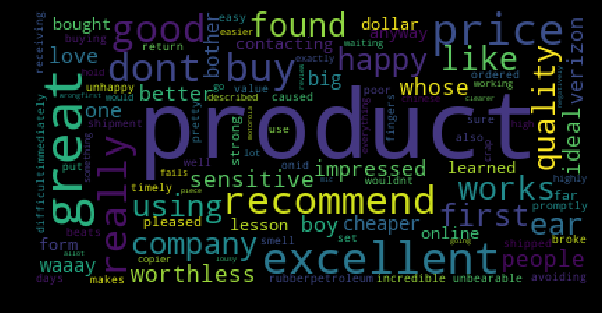

In [115]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

stopwords = nltk.corpus.stopwords.words('english')
custom_stop_words = ["amp","rt"]
#stopwords.extend(custom_stop_words)
    
original['cluster'] = model.labels_
cluster_0_index = original[original['cluster'] == 0].index
#stopwords.extend(['india','pmoindia'])

wc = WordCloud(stopwords = stopwords).generate(' '.join(doc_clean.loc[cluster_0_index]))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(wc)

Cluster 0 seems as the mixture of Positive & Negative sentiments mentioned in the amazon reviews

#### Cluster 1

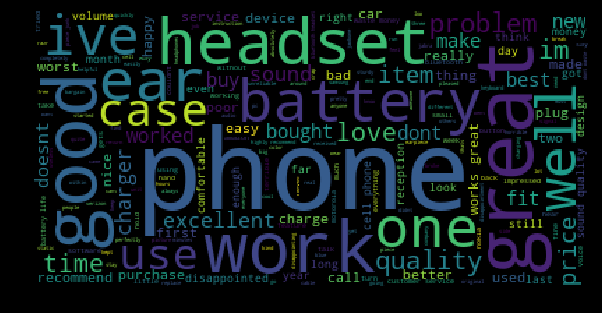

In [116]:
cluster_1_index = original[original['cluster'] == 1].index

wc = WordCloud().generate(' '.join(doc_clean.loc[cluster_1_index]))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(wc)

Cluster 1 seems as the mixture of more Positive sentiments mentioned in the amazon reviews
Conclusion: Defining only two cluster is not good enough.

In [170]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(original_labelled["sentiment"], original_labelled["labels"]))

Accuracy : 0.49287 




# 6.	Compare the accuracy of supervised and unsupervised using VADER, unsupervised using KMeans, and comment on which one gives the best result

### Supervised Learning
#### Random Forest

Accuracy : 0.74138 


             precision    recall  f1-score   support

    Negative       0.80      0.52      0.63        63
   
    Neutral       0.63      0.86      0.73        74
    
    Positive       0.84      0.79      0.82        95

    avg / total       0.76      0.74      0.74       232

#### AdaBoost

Accuracy : 0.66379 


             precision    recall  f1-score   support

    Negative       0.72      0.37      0.48        63
   
    Neutral       0.59      0.85      0.70        74
    
    Positive       0.73      0.72      0.72        95

    avg / total       0.68      0.66      0.65       232

### UnsuperVised Learning
#### K-Means

Accuracy : 0.49287


### Based on the above data Supervised Learning using Random FOrest seems like the bEst practise here.